In [1]:
# ===============================
# 1) IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

In [2]:
# UK Ice Cream Market overview (static web values or config)
uk_market_revenue_billion_gc = 4.94  # UK frozen dessert/ice cream total revenue, 2025 est (bn USD) :contentReference[oaicite:6]{index=6}
uk_market_growth_pct = 6.56         # UK segment CAGR to 2025 :contentReference[oaicite:7]{index=7}

print("UK Ice Cream Market ~${}B & ~{}% growth".format(
      uk_market_revenue_billion_gc, uk_market_growth_pct))

UK Ice Cream Market ~$4.94B & ~6.56% growth


In [3]:
# Create a list of store IDs
store_ids = [f"UK_{i:03d}" for i in range(1, 101)]  # ~100 locations

# Generate synthetic sales per hour
sales_data = []
for store in store_ids:
    for day in range(180):  # 6 months
        for hour in range(10,22):  # 10am–10pm
            dt = datetime(2025,1,1) + timedelta(days=day, hours=hour)
            base_rev = np.random.normal(250, 60)  # synthetic baseline
            trans = np.random.poisson(12) 
            avg_check = (base_rev/trans) if trans > 0 else 0
            sales_data.append((store, dt, base_rev, trans, avg_check))

sales_df = pd.DataFrame(sales_data, 
                        columns=['store','datetime','revenue','transactions','avg_check'])
sales_df.head()

,store,datetime,revenue,transactions,avg_check
0,UK_001,2025-01-01 10:00:00,299.745438,12,24.978786
1,UK_001,2025-01-01 11:00:00,218.740315,12,18.228360
2,UK_001,2025-01-01 12:00:00,165.235610,4,41.308902
3,UK_001,2025-01-01 13:00:00,240.370167,13,18.490013
4,UK_001,2025-01-01 14:00:00,267.091683,15,17.806112


In [4]:
menu = ['Single Scoop','Double Scoop','Waffle Cone','Milkshake','Sundae','Ice Cream Cake','Vegan Option']
cost = {'Single Scoop':1.1,'Double Scoop':1.9,'Waffle Cone':1.8,'Milkshake':2.7,'Sundae':2.2,'Ice Cream Cake':3.5,'Vegan Option':1.6}
price = {'Single Scoop':3.8,'Double Scoop':6.0,'Waffle Cone':5.0,'Milkshake':5.2,'Sundae':6.8,'Ice Cream Cake':9.0,'Vegan Option':4.5}

menu_records = []
for m in menu:
    sold = np.random.randint(300,1800)
    revenue = sold * price[m]
    profit = sold * (price[m] - cost[m])
    menu_records.append([m, sold, revenue, profit, profit/revenue*100])

menu_df = pd.DataFrame(menu_records, 
                       columns=['item','units_sold','revenue','profit','margin_pct'])
menu_df

,item,units_sold,revenue,profit,margin_pct
0,Single Scoop,624,2371.2,1684.8,71.052632
1,Double Scoop,729,4374.0,2988.9,68.333333
2,Waffle Cone,1603,8015.0,5129.6,64.000000
3,Milkshake,1116,5803.2,2790.0,48.076923
4,Sundae,1002,6813.6,4609.2,67.647059
5,Ice Cream Cake,314,2826.0,1727.0,61.111111
6,Vegan Option,1182,5319.0,3427.8,64.444444


In [7]:
menu_df['food_cost_pct'] = menu_df['units_sold'] * np.array(list(cost.values()))
menu_df['inv_turnover'] = np.random.uniform(4, 22, len(menu_df))

In [8]:
staff = pd.DataFrame({
    'employee_id': np.arange(1,41),
    'hourly_rate': np.random.uniform(10,15,40),
    'hours': np.random.randint(80,160,40),
    'turnover_pct': np.random.uniform(5,25,40)
})
staff['total_cost'] = staff['hourly_rate'] * staff['hours']
staff

,employee_id,hourly_rate,hours,turnover_pct,total_cost
0,1,10.421560,128,21.170797,1333.959654
1,2,14.934568,156,20.105404,2329.792600
2,3,14.952173,135,16.958504,2018.543308
3,4,14.809240,105,11.151370,1554.970185
4,5,13.769803,134,18.916353,1845.153622
5,6,10.852207,135,24.166310,1465.047884
6,7,13.121068,106,10.009730,1390.833243
7,8,14.835906,132,10.733024,1958.339609
8,9,13.909659,99,23.850552,1377.056216
9,10,11.424508,91,12.761253,1039.630247


In [9]:
customer = pd.DataFrame({
    'age': np.random.choice(range(10,80),800),
    'gender': np.random.choice(['Male','Female','Other'],800),
    'frequency': np.random.poisson(3,800),
    'feedback_score': np.random.randint(1,6,800),
    'special_req': np.random.choice(['None','Extra Toppings','No Sugar','Vegan'],800)
})
customer.describe()

,age,frequency,feedback_score
count,800.000000,800.000000,800.000000
mean,44.588750,2.962500,3.063750
std,20.609842,1.704325,1.394495
min,10.000000,0.000000,1.000000
25%,26.000000,2.000000,2.000000
50%,45.000000,3.000000,3.000000
75%,64.000000,4.000000,4.000000
max,79.000000,9.000000,5.000000


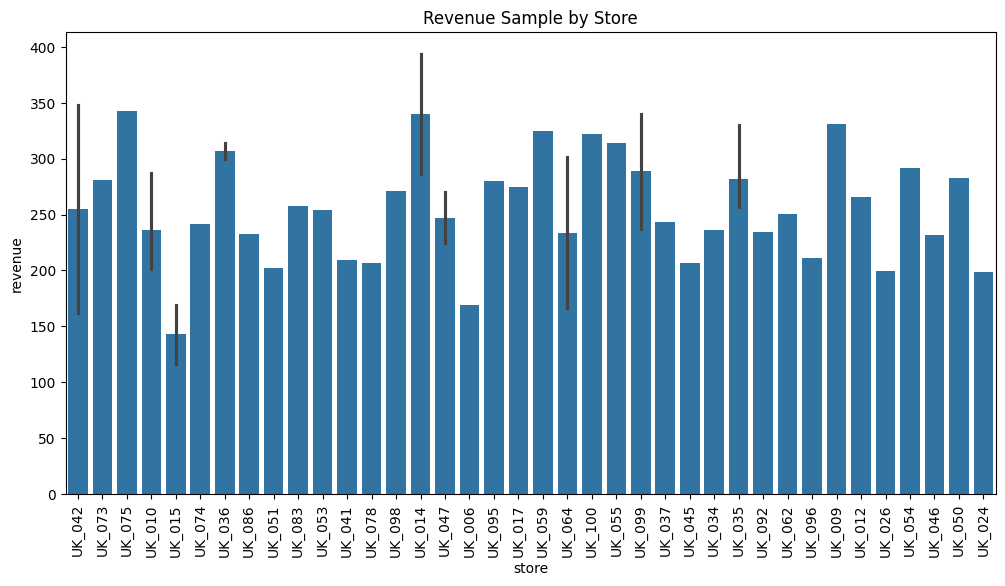

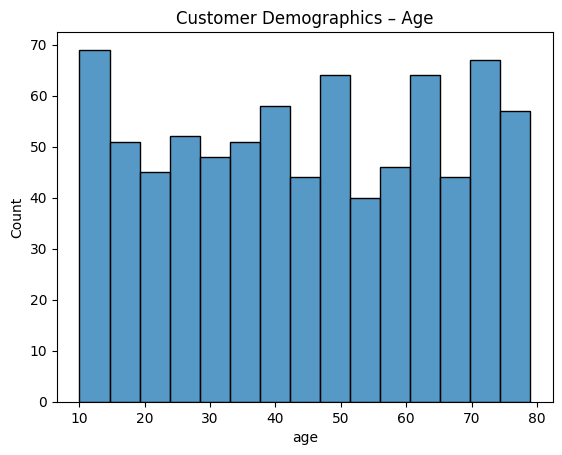

In [10]:
# Revenue by store
plt.figure(figsize=(12,6))
sns.barplot(x='store', y='revenue', data=sales_df.sample(50))
plt.title("Revenue Sample by Store")
plt.xticks(rotation=90)
plt.show()

# Customer age dist
sns.histplot(customer['age'], bins=15)
plt.title("Customer Demographics – Age")
plt.show()